In [ ]:
#All what is important here is how well can the APIs perfornn so we show diffrenece of each API output with la verite terrain

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def get_word_counts_with_target(col1, col2, col3, target_col):
    # Read the dataset
    df = pd.read_excel('datasets/dataset3.xlsx')
    df.dropna(inplace=True)
    
    # Split the sentences into words and convert to lowercase
    words1 = df[col1].str.lower().str.split()
    words2 = df[col2].str.lower().str.split()
    words3 = df[col3].str.lower().str.split()
    words_target = df[target_col].str.lower().str.split()

    # Flatten the lists of words and count the occurrences of each word
    word_counts1 = Counter(word for words in words1 for word in words)
    word_counts2 = Counter(word for words in words2 for word in words)
    word_counts3 = Counter(word for words in words3 for word in words)
    word_counts_target = Counter(word for words in words_target for word in words)

    # Get the common and uncommon words and their counts
    un_common_words1 = (word_counts1 & word_counts_target) - (word_counts2 | word_counts3)
    un_common_words2 = (word_counts2 & word_counts_target) - (word_counts1 | word_counts3)
    un_common_words3 = (word_counts3 & word_counts_target) - (word_counts1 | word_counts2)
    
    common_words1 = ((word_counts2 | word_counts3) | word_counts_target) - un_common_words1
    common_words2 = ((word_counts1 | word_counts3) | word_counts_target) - un_common_words2
    common_words3 = ((word_counts1 | word_counts2) | word_counts_target) - un_common_words3

    # Sum up the counts of common and uncommon words
    un_common_word_count1 = sum(un_common_words1.values())
    common_word_count1 = sum(common_words1.values())
    
    un_common_word_count2 = sum(un_common_words2.values())
    common_word_count2 = sum(common_words2.values())
    
    un_common_word_count3 = sum(un_common_words3.values())
    common_word_count3 = sum(common_words3.values())

    # Plot the bar chart
    bar_width = 0.35
    index = [0, 1, 2]
    
    plt.bar(index, [un_common_word_count1, un_common_word_count2, un_common_word_count3], bar_width, label='Uncommon Words')
    plt.bar([i + bar_width for i in index], [common_word_count1, common_word_count2, common_word_count3], bar_width, label='Common Words')
    
    plt.xticks([i + bar_width/2 for i in index], [col1, col2, col3])
    
    plt.legend()
    
    plt.title(f'Common and Uncommon Words with {target_col} in {col1}, {col2}, and {col3}')
    
    plt.savefig(f'plots/plot3/Common_Uncommon_with_Target.png')
    
    plt.show()

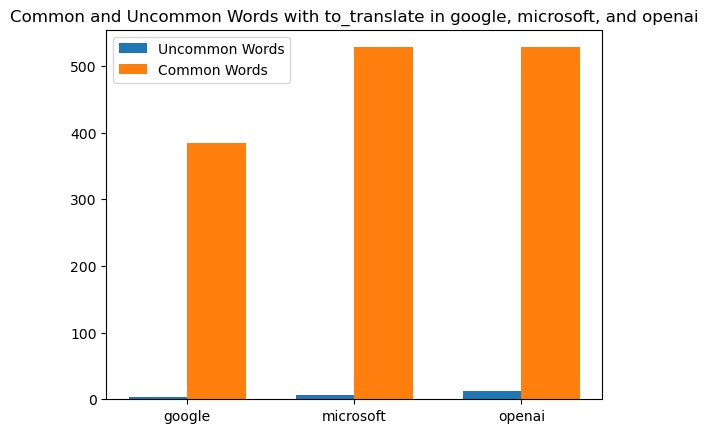

In [28]:
get_word_counts_with_target('google', 'microsoft', 'openai', 'to_translate')